In [859]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [860]:
import os
lst = os.listdir('./new_extracted_data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./new_extracted_data/' + file))

In [861]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data

,section_count_ratio,section_count_ratio_str,max_angle,max_section,average_section,square,time,condition
0,0.227273,5 / 22,18.678759,200.489401,54.962335,13.519368,634.9989,0
1,0.215190,17 / 79,95.710593,693.100281,83.343486,45.873249,1988.4432,0
2,0.223529,19 / 85,173.792233,316.183491,82.982376,237.433715,16009.9174,0
3,0.127660,12 / 94,24.443955,472.120747,134.326705,53.827819,950.8637,0
4,0.714286,5 / 7,68.198591,33.015148,15.515086,13.689506,1430.4553,0
...,...,...,...,...,...,...,...,...
794,0.306122,15 / 49,168.690068,350.703579,48.230433,96.510322,9823.0747,1
795,0.157895,9 / 57,32.114831,469.025586,117.853452,31.275727,909.1915,1
796,0.107143,6 / 56,26.452042,617.681148,120.230472,16.176949,1182.1368,1
797,0.095238,4 / 42,37.663112,493.536220,140.351285,15.429036,902.0947,1


In [862]:
all_data['max_angle'].max()

180.0

In [863]:
all_data = all_data[all_data['section_count_ratio_str'] != '2 / 2']
all_data = all_data[all_data['section_count_ratio_str'] != '1 / 2']

In [864]:
all_data

,section_count_ratio,section_count_ratio_str,max_angle,max_section,average_section,square,time,condition
0,0.227273,5 / 22,18.678759,200.489401,54.962335,13.519368,634.9989,0
1,0.215190,17 / 79,95.710593,693.100281,83.343486,45.873249,1988.4432,0
2,0.223529,19 / 85,173.792233,316.183491,82.982376,237.433715,16009.9174,0
3,0.127660,12 / 94,24.443955,472.120747,134.326705,53.827819,950.8637,0
4,0.714286,5 / 7,68.198591,33.015148,15.515086,13.689506,1430.4553,0
...,...,...,...,...,...,...,...,...
794,0.306122,15 / 49,168.690068,350.703579,48.230433,96.510322,9823.0747,1
795,0.157895,9 / 57,32.114831,469.025586,117.853452,31.275727,909.1915,1
796,0.107143,6 / 56,26.452042,617.681148,120.230472,16.176949,1182.1368,1
797,0.095238,4 / 42,37.663112,493.536220,140.351285,15.429036,902.0947,1


In [865]:
for el in all_data.section_count_ratio_str.value_counts().sort_index().index:
    print(el)

1 / 11
1 / 12
1 / 13
1 / 19
1 / 26
1 / 3
1 / 4
1 / 5
1 / 6
1 / 7
1 / 8
1 / 9
10 / 102
10 / 103
10 / 104
10 / 109
10 / 122
10 / 13
10 / 22
10 / 25
10 / 27
10 / 28
10 / 30
10 / 33
10 / 37
10 / 41
10 / 44
10 / 49
10 / 51
10 / 52
10 / 54
10 / 57
10 / 58
10 / 60
10 / 61
10 / 62
10 / 63
10 / 65
10 / 66
10 / 67
10 / 68
10 / 72
10 / 73
10 / 82
10 / 84
10 / 89
10 / 90
10 / 93
11 / 103
11 / 107
11 / 112
11 / 121
11 / 14
11 / 24
11 / 25
11 / 26
11 / 31
11 / 33
11 / 35
11 / 38
11 / 43
11 / 45
11 / 46
11 / 47
11 / 48
11 / 50
11 / 52
11 / 54
11 / 58
11 / 59
11 / 60
11 / 61
11 / 63
11 / 65
11 / 66
11 / 67
11 / 68
11 / 75
11 / 76
11 / 78
11 / 80
11 / 84
11 / 85
11 / 87
11 / 89
11 / 92
12 / 101
12 / 104
12 / 105
12 / 109
12 / 114
12 / 25
12 / 26
12 / 33
12 / 35
12 / 39
12 / 45
12 / 47
12 / 52
12 / 53
12 / 57
12 / 58
12 / 59
12 / 61
12 / 62
12 / 65
12 / 68
12 / 69
12 / 72
12 / 73
12 / 77
12 / 80
12 / 83
12 / 86
12 / 87
12 / 89
12 / 90
12 / 93
12 / 94
12 / 95
12 / 97
12 / 99
13 / 105
13 / 17
13 / 34
13 /

In [866]:
all_data = all_data[all_data['section_count_ratio_str'] != '2 / 2']
all_data = all_data[all_data['section_count_ratio_str'] != '1 / 2']

In [867]:
all_data = all_data.drop(columns='section_count_ratio_str')

In [868]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

213

In [869]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [870]:
len(all_data[all_data.condition == 0])

213

In [871]:
len(all_data[all_data.condition == 1])

213

In [872]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 188 to 706
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section_count_ratio  426 non-null    float64
 1   max_angle            426 non-null    float64
 2   max_section          426 non-null    float64
 3   average_section      426 non-null    float64
 4   square               426 non-null    float64
 5   time                 426 non-null    float64
 6   condition            426 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 26.6 KB


In [873]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section_count_ratio  0 non-null      float64
 1   max_angle            0 non-null      float64
 2   max_section          0 non-null      float64
 3   average_section      0 non-null      float64
 4   square               0 non-null      float64
 5   time                 0 non-null      float64
 6   condition            0 non-null      int64  
dtypes: float64(6), int64(1)
memory usage: 0.0 bytes


In [874]:
all_data.drop_duplicates(keep='first', inplace = True)

In [875]:
def print_hist_boxplot_heatmap(data):
    data.hist(figsize = (25, 25), grid = True)
    for el in data:
        sns.boxplot(x=data[el])
        plt.show()
    plt.figure(figsize=(10, 6))
    sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

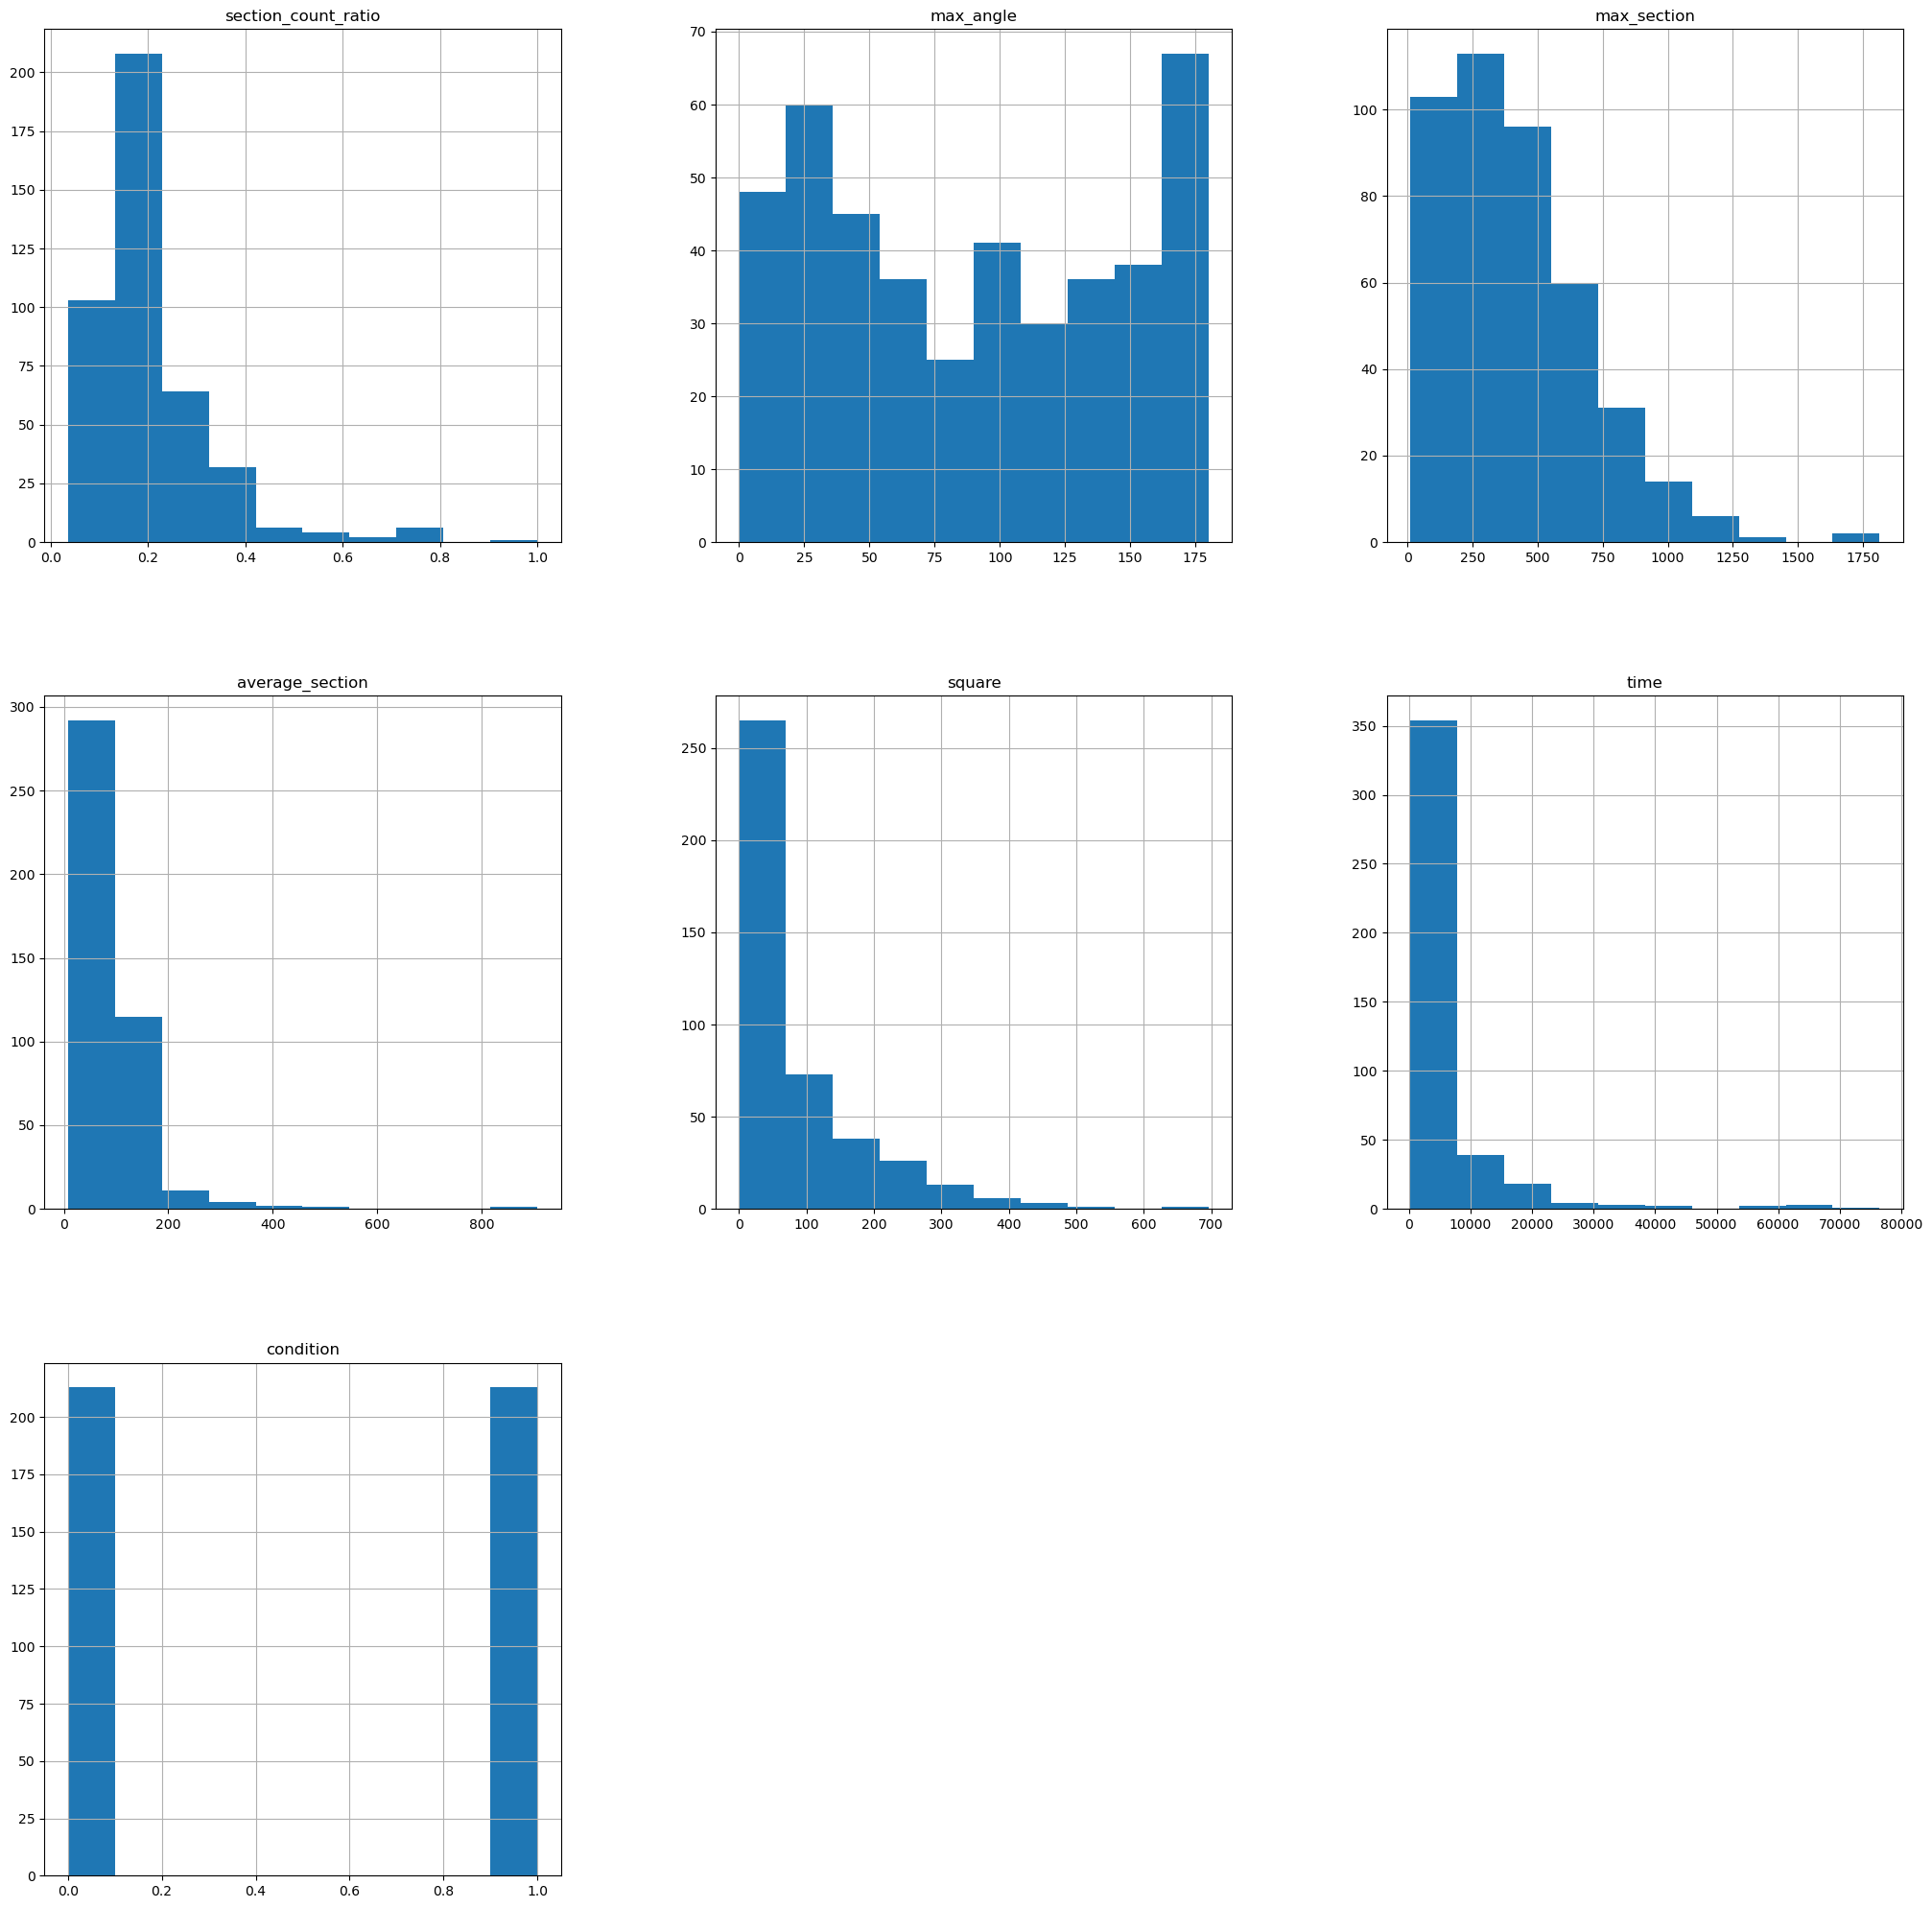

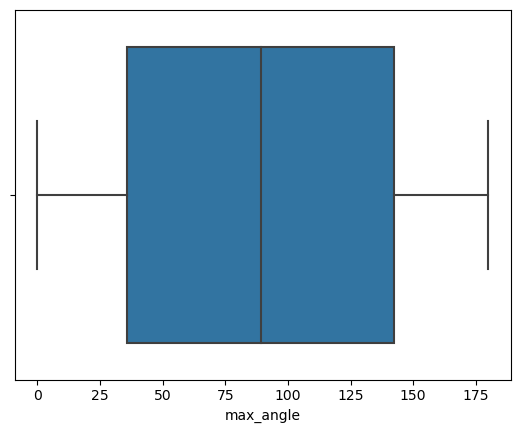

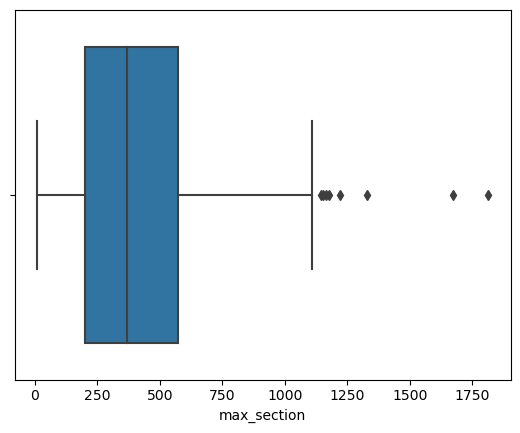

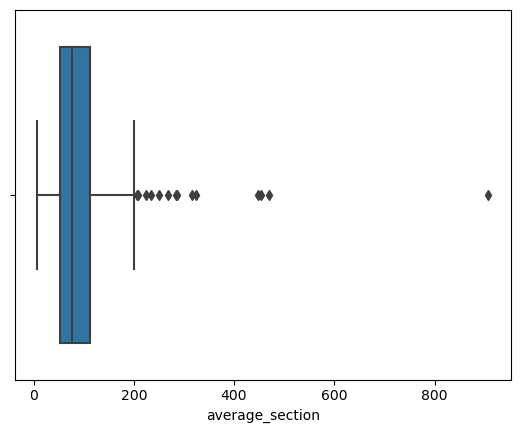

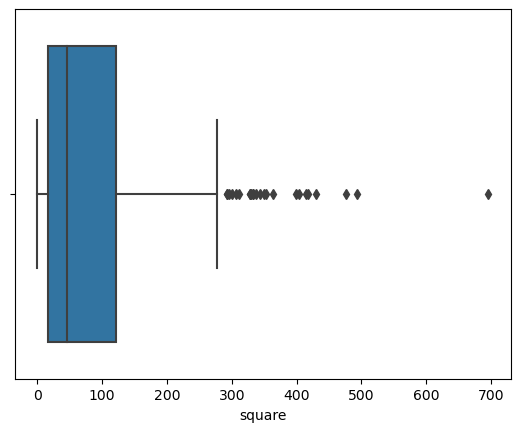

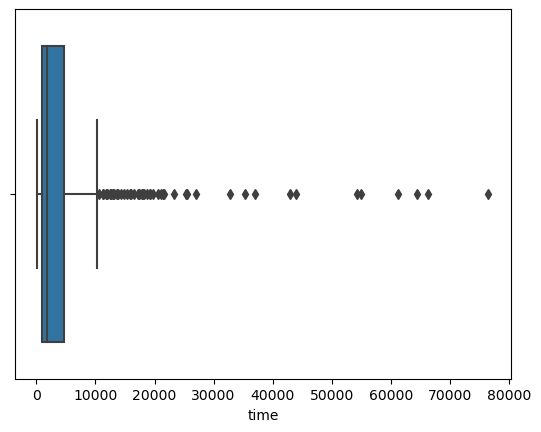

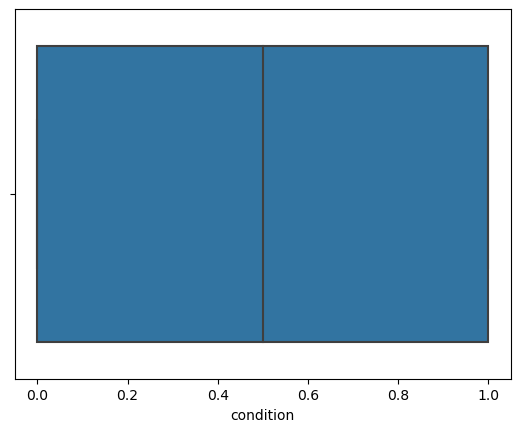

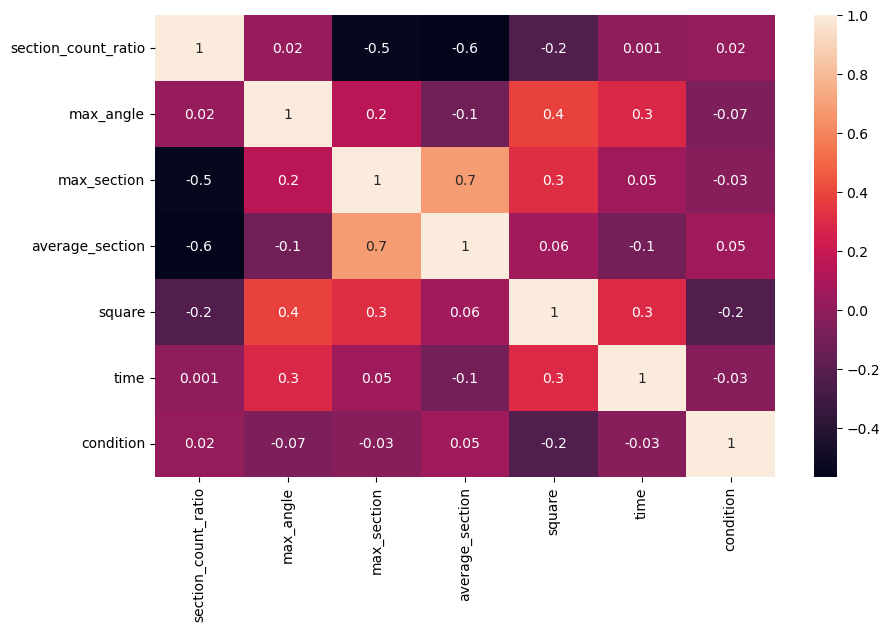

In [876]:
print_hist_boxplot_heatmap(all_data)

In [877]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(318, 7)

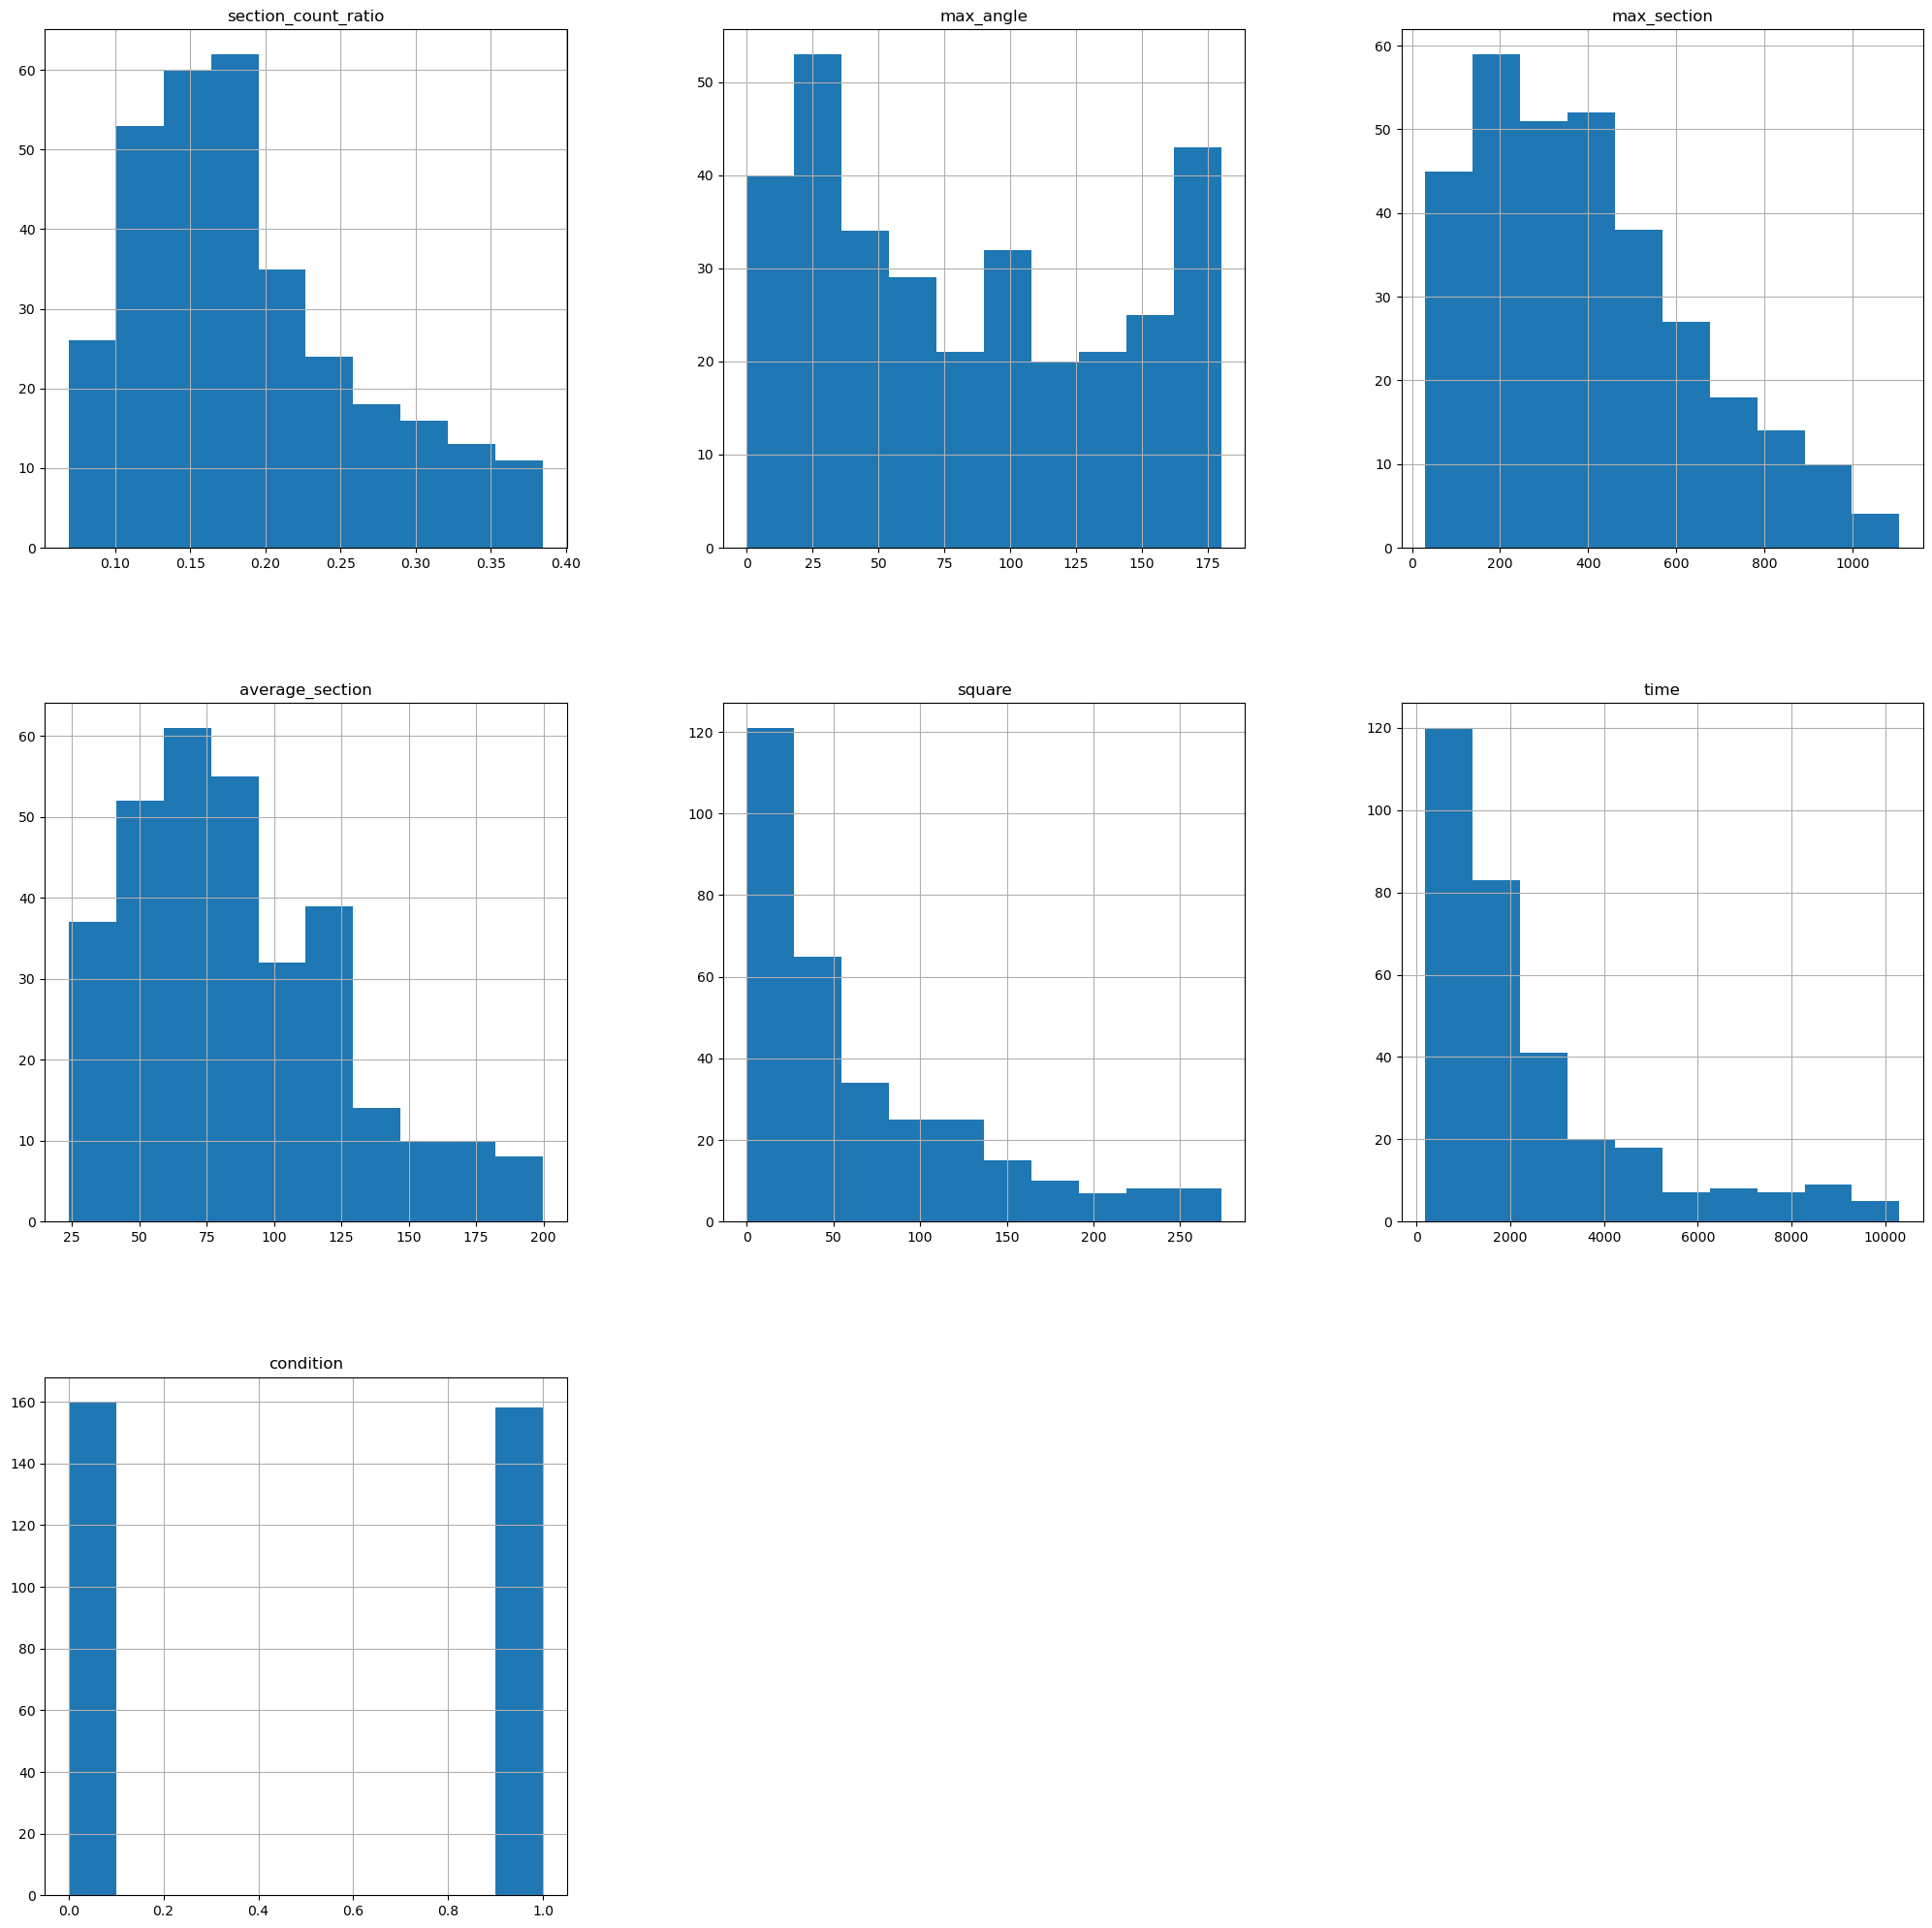

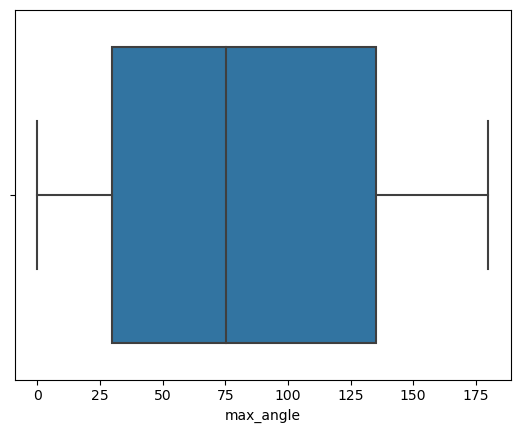

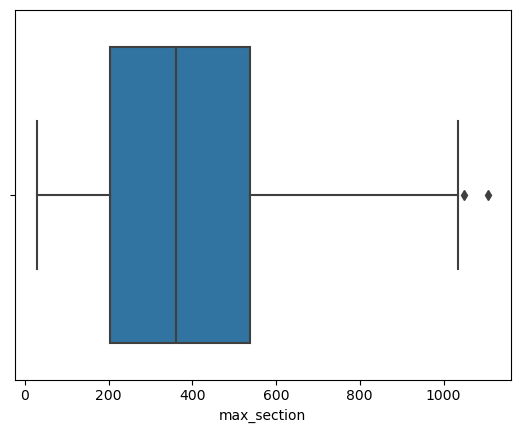

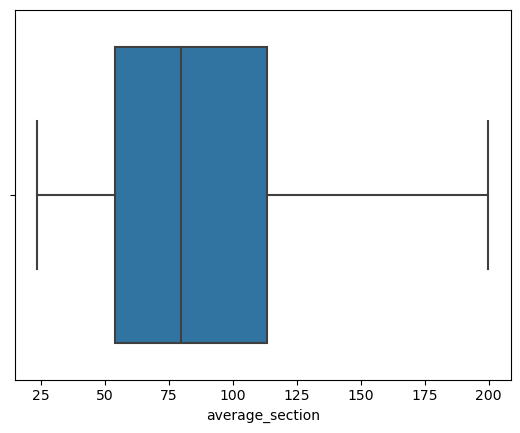

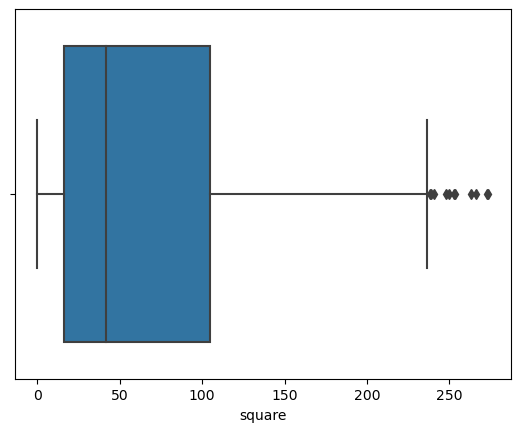

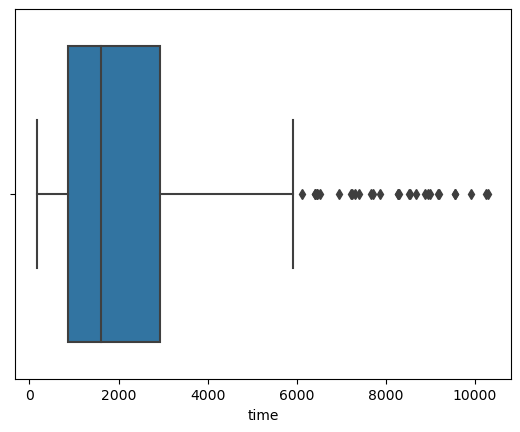

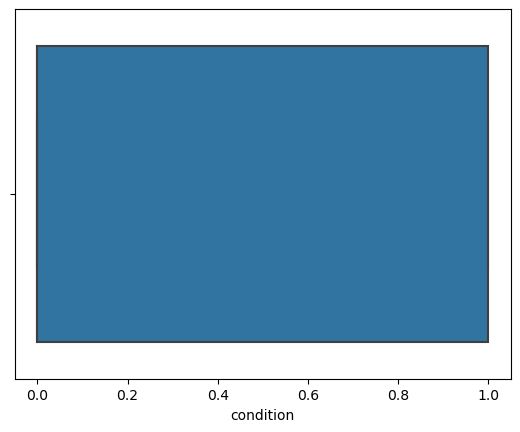

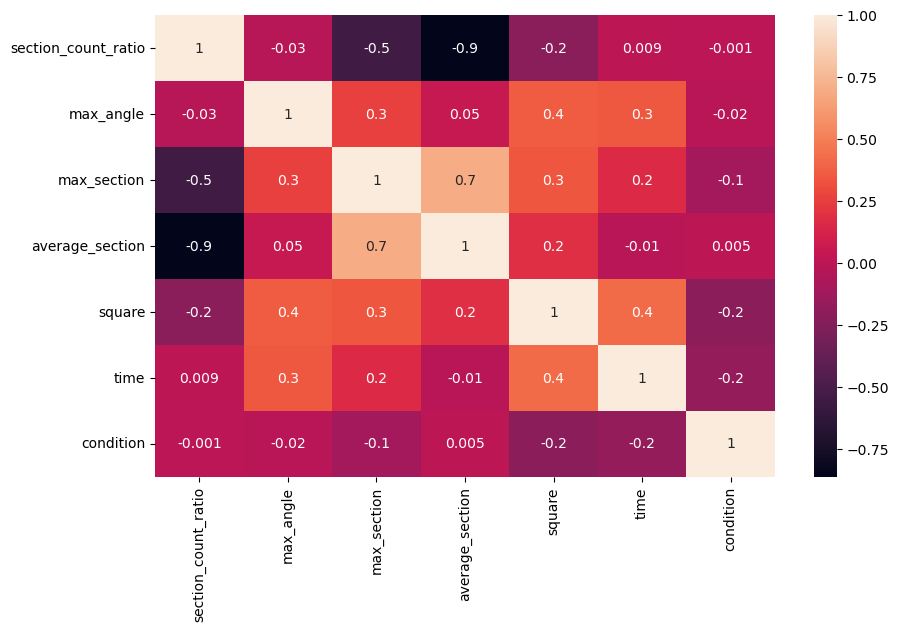

In [878]:
print_hist_boxplot_heatmap(all_data)

In [879]:
from sklearn.preprocessing import StandardScaler
scale_data = all_data.drop("condition", axis=1)
scaled_features = StandardScaler().fit_transform(scale_data.values)
scale_data = pd.DataFrame(scaled_features, index=scale_data.index, columns=scale_data.columns)

all_data = pd.concat([scale_data,all_data["condition"]], axis=1)

In [880]:
#all_data = all_data.drop(['max_angle', 'square', 'average_section'], axis=1)

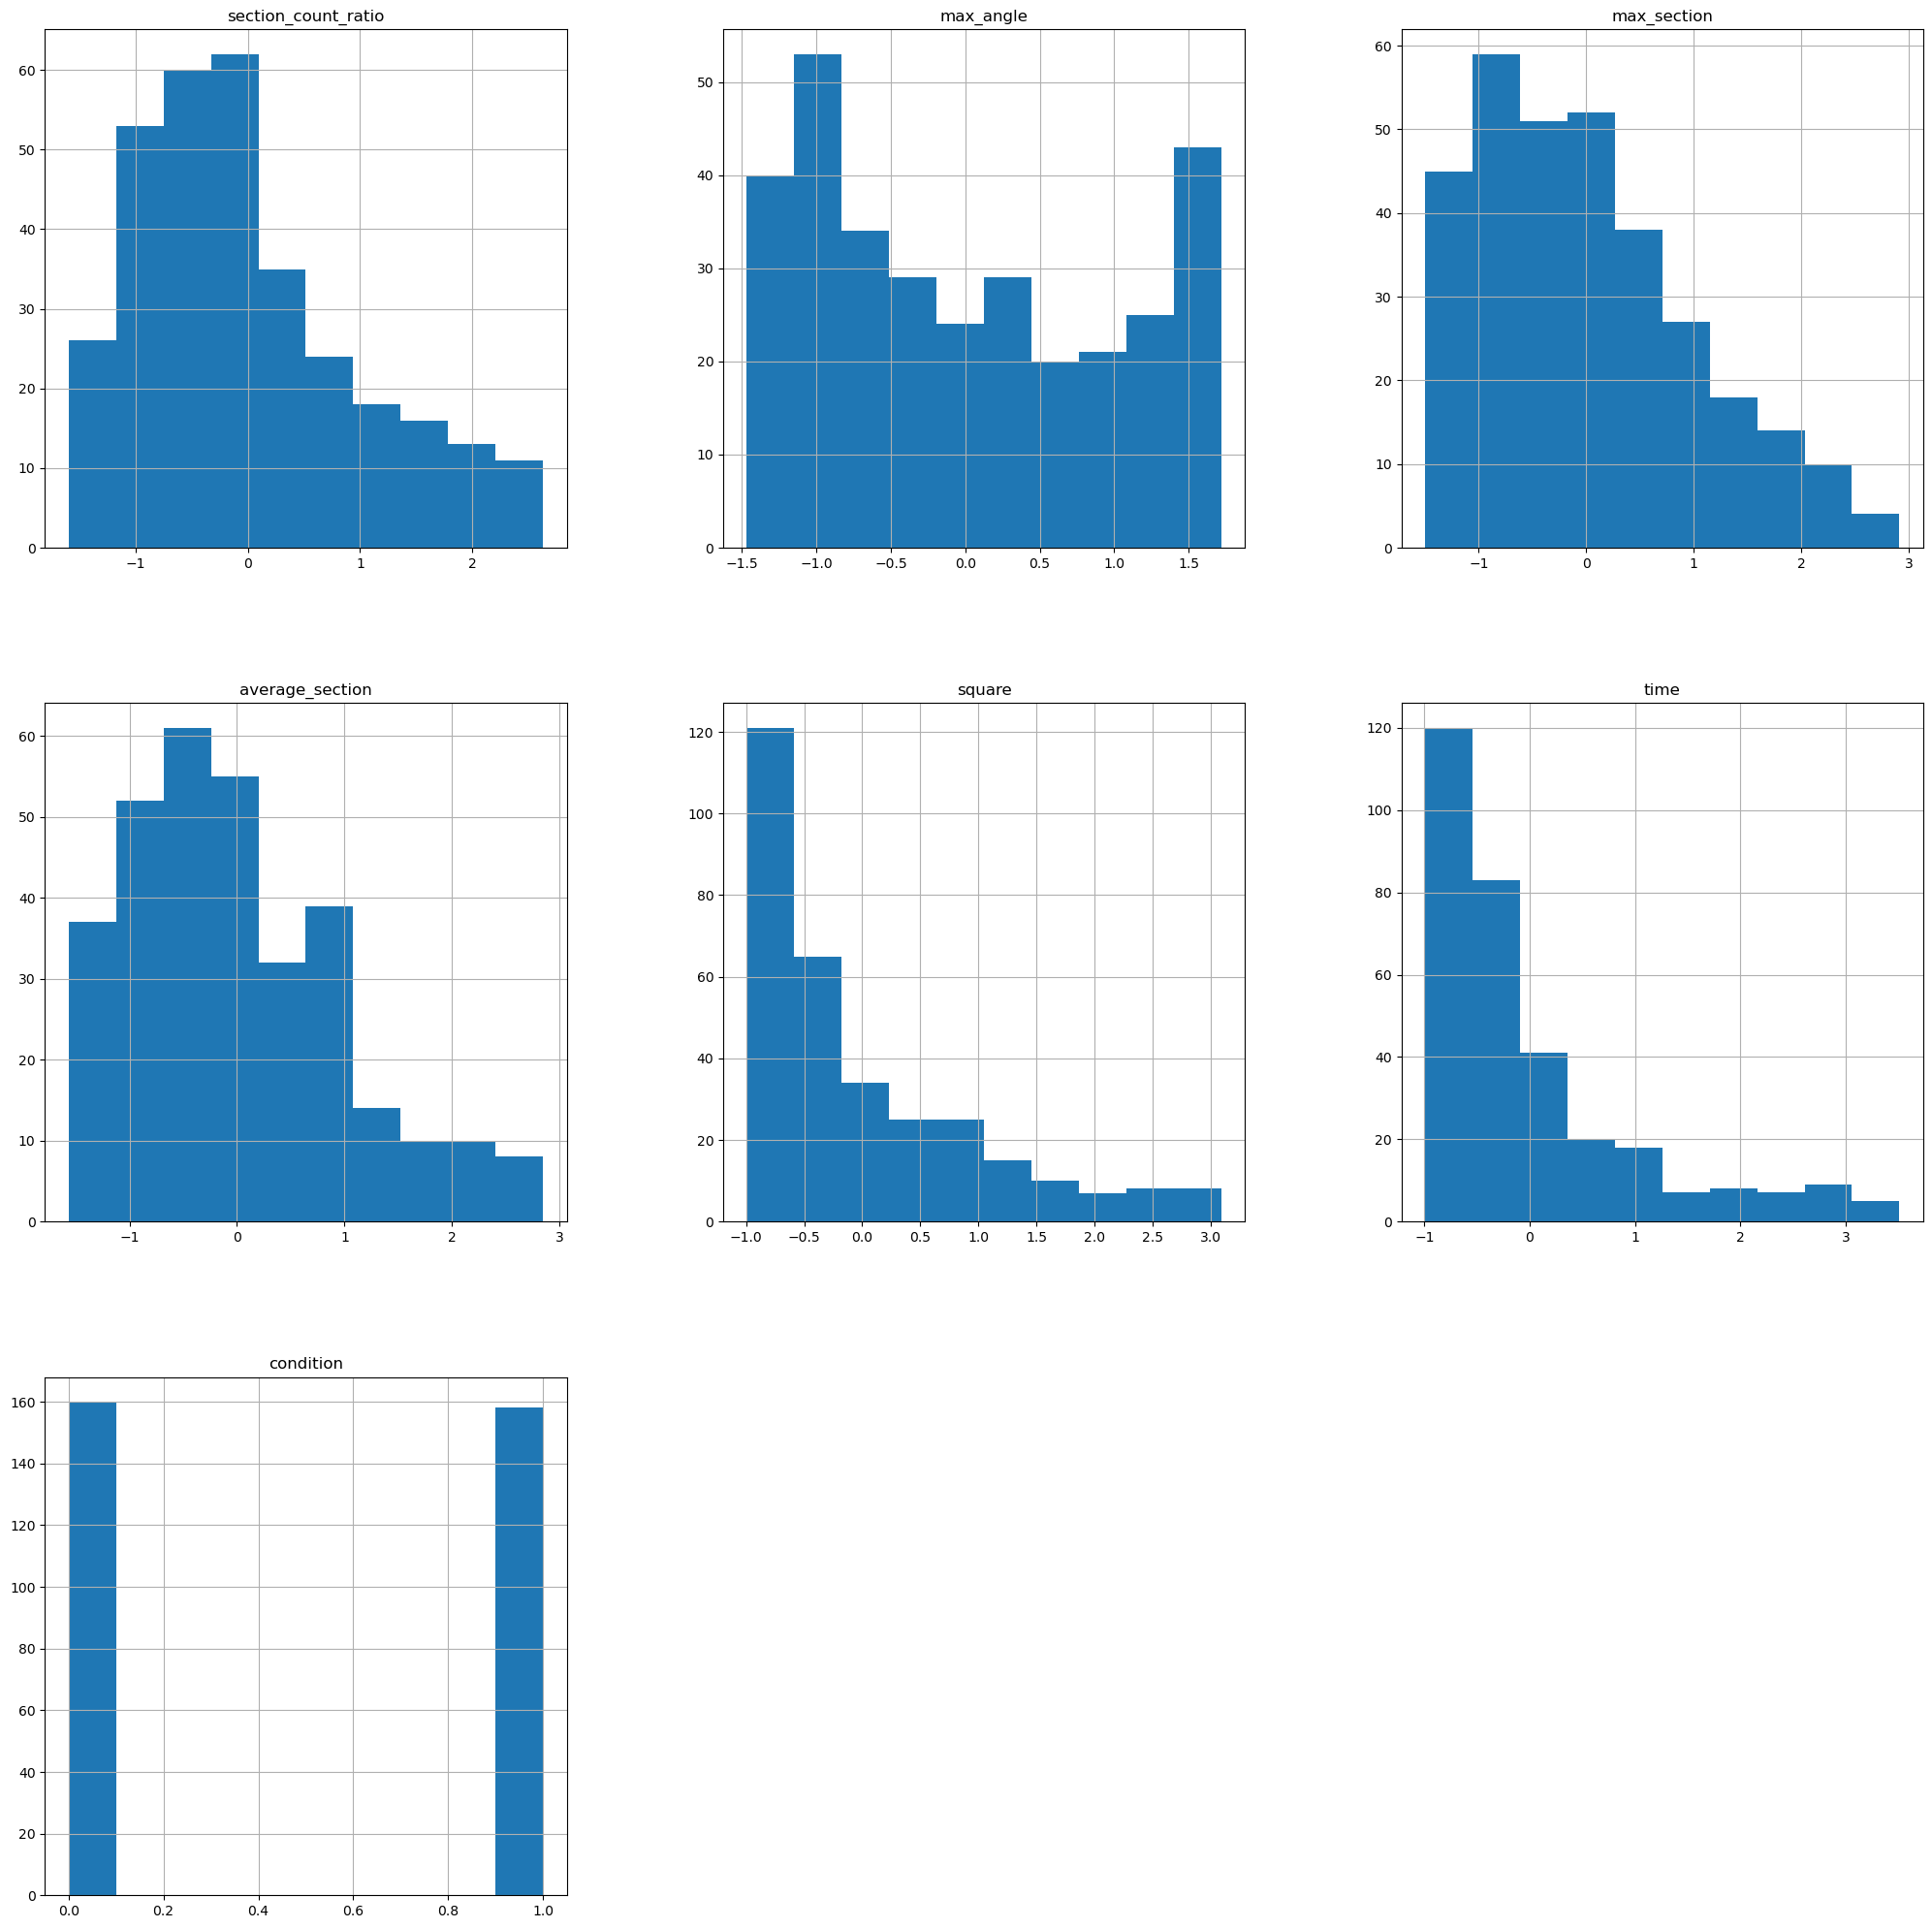

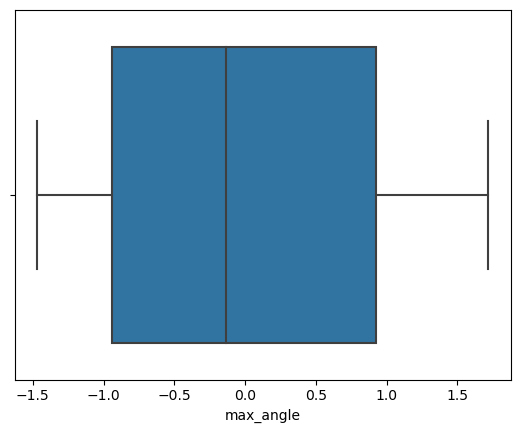

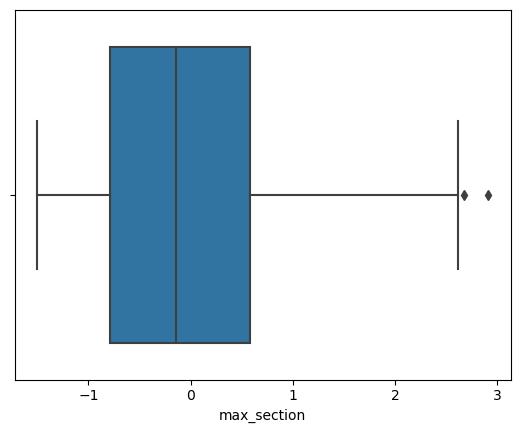

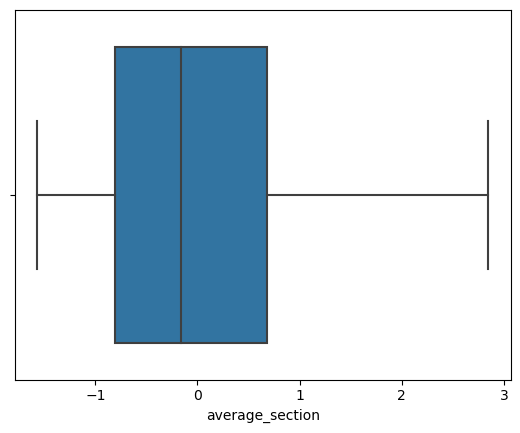

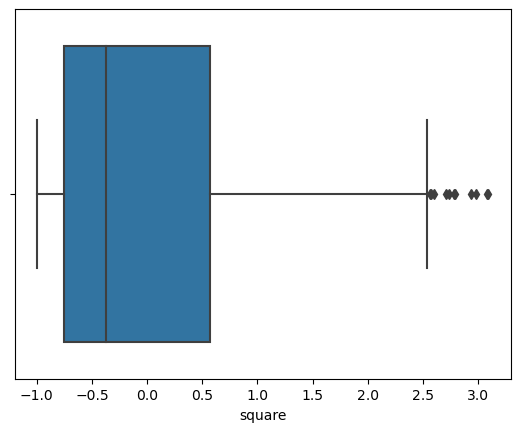

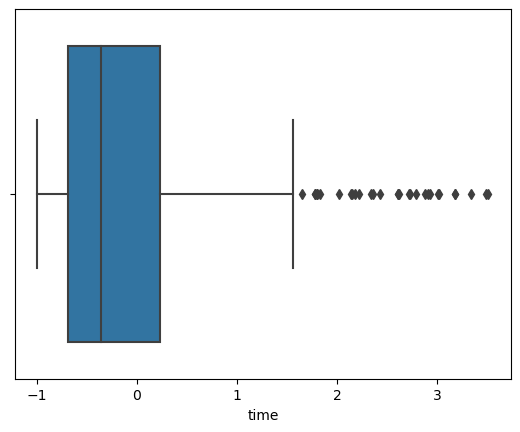

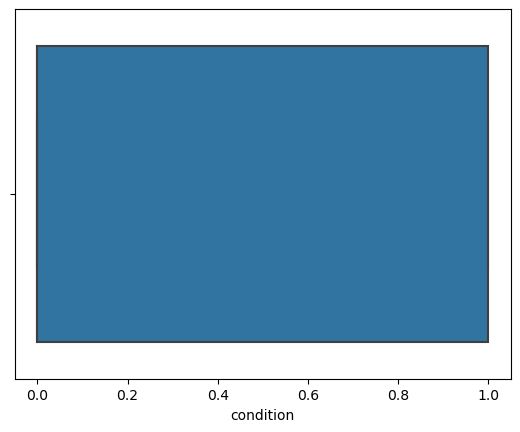

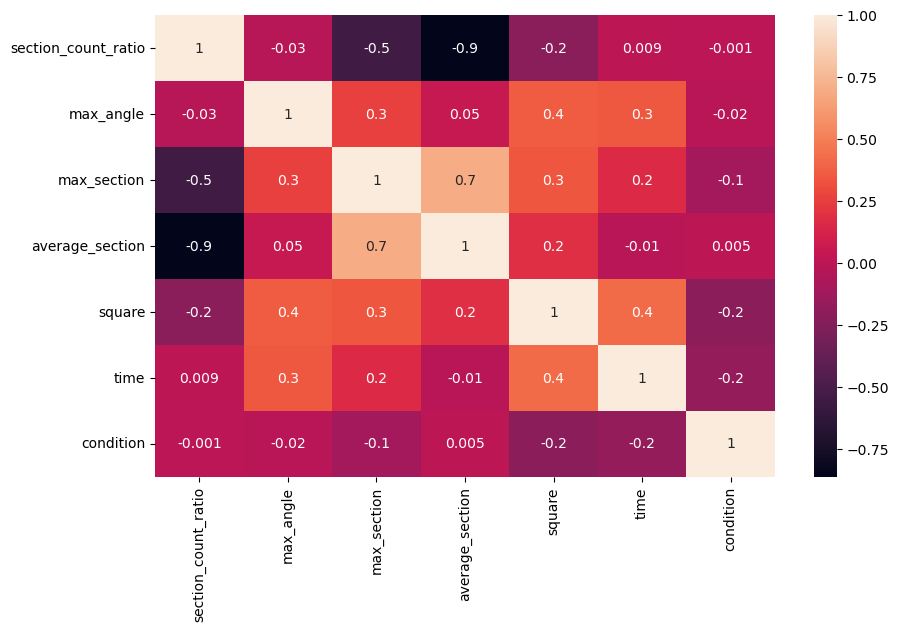

In [881]:
print_hist_boxplot_heatmap(all_data)

In [882]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.43752055 0.27261186]


Обучение

In [883]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [884]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [885]:
X_train

,section_count_ratio,max_angle,max_section,average_section,square,time
430,-0.916035,-0.725040,0.999873,1.179901,-0.846299,-0.302308
79,-0.769173,-0.471100,0.498067,0.262184,0.836094,-0.232457
194,-0.825382,1.084335,-0.649971,0.398974,2.107863,-0.360912
480,0.491925,-0.571932,-0.416053,-0.817188,-0.764890,-0.616544
424,-0.675595,1.717842,1.799503,1.638690,2.705279,-0.182094
...,...,...,...,...,...,...
710,-0.041958,-0.332359,-0.309150,-0.380579,-0.779757,-0.592998
58,-0.087106,0.015500,0.719373,0.055551,1.493952,-0.257871
129,1.050639,0.752423,-0.662280,-0.989157,-0.588950,-0.315091
684,1.600758,-1.199210,-1.375998,-1.313237,-0.947104,-0.773533


In [886]:
y_train

430    1
79     0
194    0
480    1
424    1
      ..
710    1
58     0
129    0
684    1
15     0
Name: condition, Length: 254, dtype: int64

Градиентый бустинг

In [887]:
from xgboost import XGBClassifier

In [888]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [2, 5, 10, 50],
        'n_estimators': [50, 100, 500]
        }

In [889]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02], 'max_depth': [2, 5, 10, 50],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [890]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [891]:
y_pred = best_clf.predict(X_test)

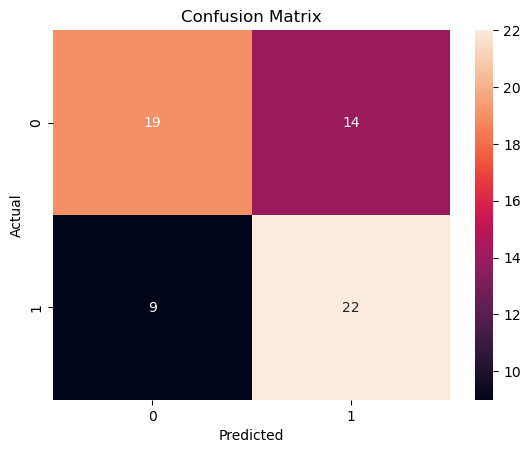

In [892]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [893]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.68      0.58      0.62        33
     class 1       0.61      0.71      0.66        31

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



Случайный лес

In [894]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [895]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [896]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [897]:
y_pred = best_clf.predict(X_test)

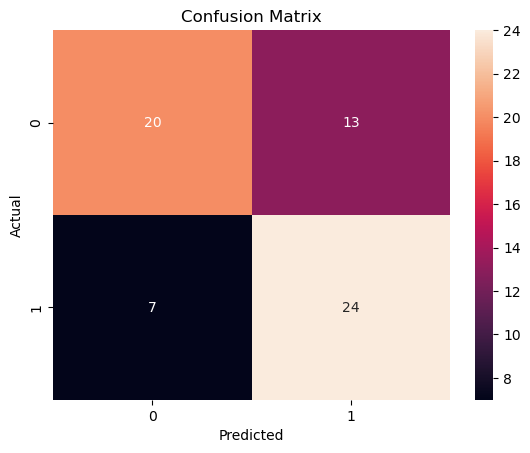

In [898]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [899]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.61      0.67        33
     class 1       0.65      0.77      0.71        31

    accuracy                           0.69        64
   macro avg       0.69      0.69      0.69        64
weighted avg       0.70      0.69      0.69        64



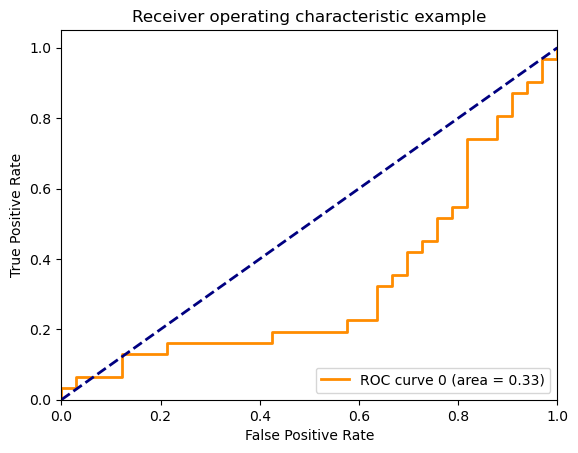

In [900]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

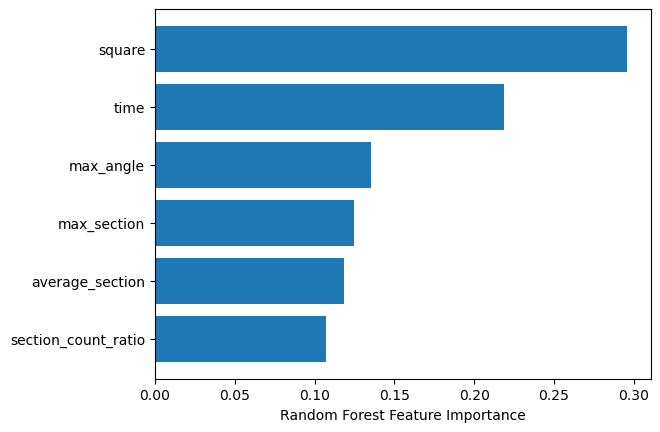

In [901]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [902]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [903]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [904]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [905]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}

In [906]:
y_pred = best_clf.predict(X_test)

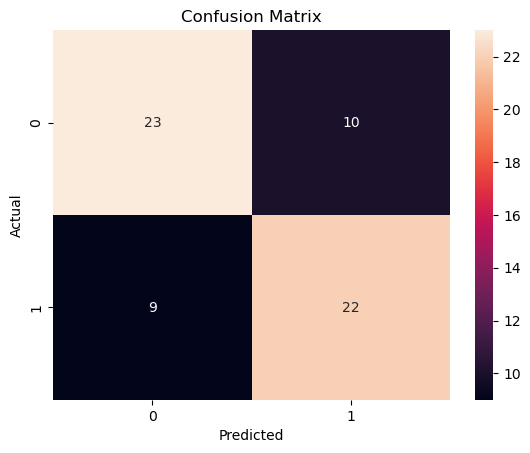

In [907]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [908]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.70      0.71        33
     class 1       0.69      0.71      0.70        31

    accuracy                           0.70        64
   macro avg       0.70      0.70      0.70        64
weighted avg       0.70      0.70      0.70        64



SVM

In [909]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [910]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [911]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [912]:
y_pred = best_clf.predict(X_test)

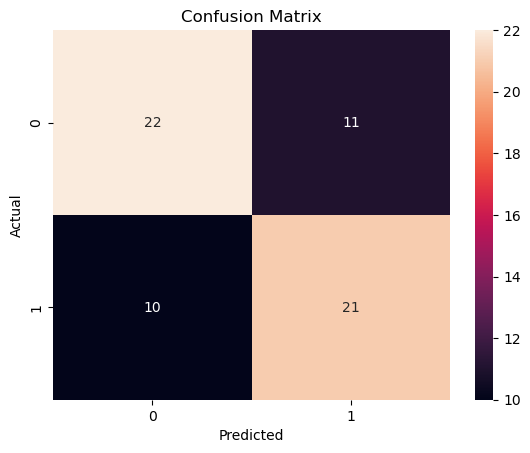

In [913]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [914]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.67      0.68        33
     class 1       0.66      0.68      0.67        31

    accuracy                           0.67        64
   macro avg       0.67      0.67      0.67        64
weighted avg       0.67      0.67      0.67        64

